In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("Restaurant_Train.csv")
test = pd.read_csv("Restaurent_Test.csv")

In [3]:
train.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [4]:
test.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [7]:
train.shape

(12690, 9)

In [8]:
test.shape

(4231, 8)

In [9]:
train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [10]:
test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [11]:
train["source"] = "train"
test["source"] = "test"

In [12]:
df = pd.concat([train,test])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          16921 non-null  object 
 1   RESTAURANT_ID  16921 non-null  int64  
 2   CUISINES       16921 non-null  object 
 3   TIME           16921 non-null  object 
 4   CITY           16774 non-null  object 
 5   LOCALITY       16793 non-null  object 
 6   RATING         16917 non-null  object 
 7   VOTES          15315 non-null  object 
 8   COST           12690 non-null  float64
 9   source         16921 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB


In [14]:
df.duplicated().sum()

26

In [15]:
df= df.drop_duplicates()

In [16]:
df.isna().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
VOTES            1602
COST             4230
source              0
dtype: int64

<Axes: xlabel='RATING'>

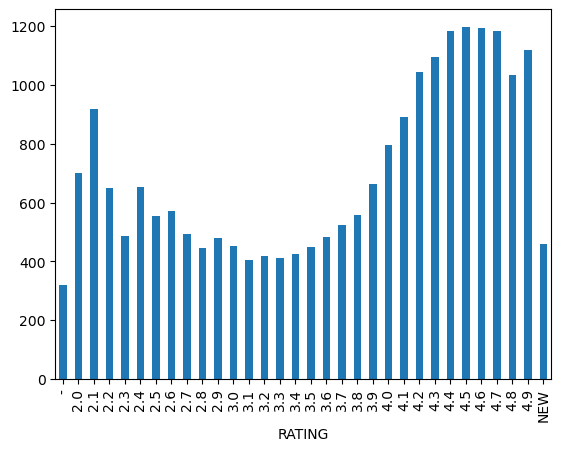

In [17]:
train.groupby(['RATING'])['COST'].mean().plot(kind='bar')

<Axes: xlabel='RATING'>

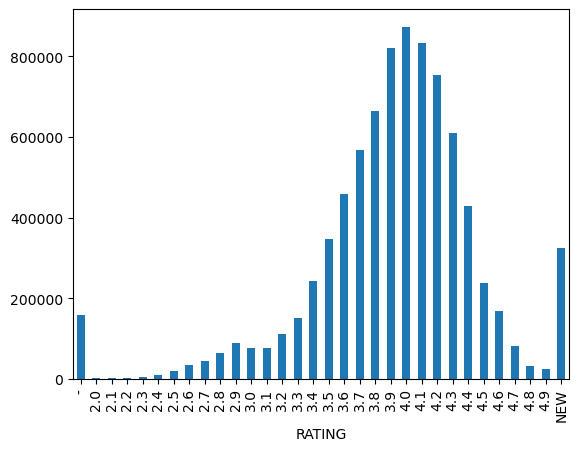

In [18]:
train.groupby(['RATING'])['COST'].sum().plot(kind='bar')

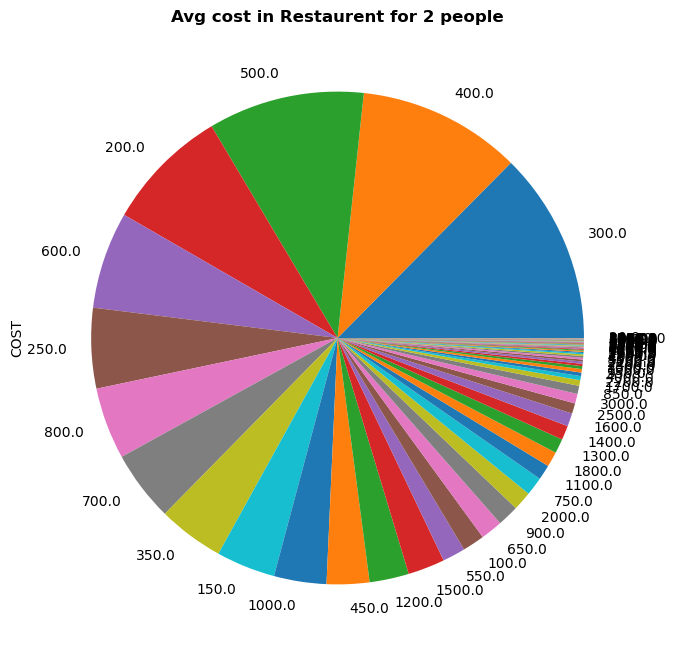

In [19]:
plt.figure(figsize = (8,8))
df['COST'].value_counts()[:20].plot(kind = 'pie')
plt.title('Avg cost in Restaurent for 2 people', weight = 'bold')
plt.show()

In [21]:
df['Location']=df['CITY']+' '+df['LOCALITY']
df.drop(columns=['CITY','LOCALITY'])

,TITLE,RESTAURANT_ID,CUISINES,TIME,RATING,VOTES,COST,source,Location
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",3.6,49 votes,1200.0,train,Thane Dombivali East
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),4.2,30 votes,1500.0,train,Chennai Ramapuram
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",3.8,221 votes,800.0,train,Chennai Saligramam
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),4.1,24 votes,800.0,train,Mumbai Bandra West
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),3.8,165 votes,300.0,train,Mumbai Lower Parel
...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),3.9,287 votes,NaN,test,New Delhi Punjabi Bagh
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),4.3,469 votes,NaN,test,Bangalore HSR Layout
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),3.7,53 votes,NaN,test,Faridabad Sector 86
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",-,NaN,NaN,test,Kochi Kochi


In [22]:
df.dropna(subset=['Location'],inplace=True)

In [23]:
names_array=[]
def match_names(wrong_names,correct_names):
    for row in wrong_names:
        x=(row, correct_names)
        if x[1]:
            names_array.append('Others')
        else:
            names_array.append(x[0])
    return names_array

correct_names=['Bangalore','Thane',
'Hyderabad','Andheri',
'Delhi', 'Kerala',
'Chennai', 'Bandra',
'Mumbai', 'Telangana',
'Kochi', 
'Noida', 
'Gurgaon', 'Ernakulam',
'Faridabad', 'Ghaziabad',
'Secunderabad' ]
name_match=match_names(df.Location,correct_names)   

print(len(names_array))
df['Location']=names_array

16747


In [24]:
cuisines_list=[]
for row in df['CUISINES']:
    cuisines_list.append(list(row.split(',')))

df['CUISINES']=cuisines_list

In [25]:
df['CUISINES'].isna().sum()

0

In [26]:
df_cuisines=df['CUISINES'].apply(lambda x: pd.Series(1, x))

In [27]:
title_list=[]
for row in df['TITLE']:
    title_list.append(list(row.split(',')))
df['TITLE']=title_list

In [28]:
df_title=df['TITLE'].apply(lambda x: pd.Series(1, x))

In [29]:
df_title.head()

,CASUAL DINING,BAR,QUICK BITES,DESSERT PARLOR,CAFÉ,MICROBREWERY,BEVERAGE SHOP,IRANI CAFE,BAKERY,None,...,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP,BHOJANALYA
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df[df['RATING'].isna()]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source,Location
204,[BAKERY],15062,[Bakery],Not Available,Kochi,Marine Drive,NaN,NaN,200.0,train,Others
421,[CAFÉ],14127,"[Cafe, Fast Food]",Not Available,Hyderabad,Banjara Hills,NaN,NaN,350.0,train,Others
2035,[QUICK BITES],2776,"[Kerala, Arabian]",Not Available,Kochi,Kakkanad,NaN,NaN,NaN,test,Others
2758,[None],11301,"[Chinese, North Indian, South Indian]",Not Available,Kochi,Tripunithura,NaN,NaN,NaN,test,Others


In [31]:
df["RATING"] = df.groupby("CITY").RATING.transform(lambda x : x.fillna(x.mode()[0]))

In [32]:
df['RATING']=df['RATING'].str.extract('(\d+)').astype(float)

In [33]:
df['VOTES'].isna().sum()

1579

In [34]:
df.VOTES.fillna('0',inplace=True)
df['VOTES']=df['VOTES'].str.extract('(\d+)').astype(float)

In [35]:
df.drop(columns='CITY',inplace=True)
df.drop(columns='LOCALITY',inplace=True)
df.drop(columns='CUISINES',inplace=True)

In [36]:
df_City=pd.get_dummies(df['Location'])
df.drop(columns='Location',inplace=True)
df_City.head()

,Others
0,1
1,1
2,1
3,1
4,1


In [37]:
df = pd.concat([df,df_City,df_cuisines,df_title], axis=1)

In [38]:
df = pd.concat([df,df_City,df_cuisines,df_title], axis=1)

In [39]:
df_column_category = df.select_dtypes(exclude=np.number).columns
df_column_category

Index(['TITLE', 'TIME', 'source'], dtype='object')

In [40]:
df.drop(columns='TIME',inplace=True)

In [41]:
df.fillna(0,inplace=True)

In [42]:
train_final = df[df.source=="train"]
test_final = df[df.source=="test"]

In [43]:
train_final.shape

(12552, 516)

In [44]:
train_final.drop(columns=["source"],inplace=True)

In [45]:
test_final.drop(columns=["source",'COST'],inplace=True)

In [46]:
train_X = train_final.drop(columns=["COST",'RESTAURANT_ID'])

In [47]:
train_Y = train_final["COST"]

In [48]:
test_X = test_final.drop(columns=["RESTAURANT_ID"])

In [49]:
target = train['COST']
train = train.drop('COST', axis=1)

In [50]:
train = pd.get_dummies(train)
train.head()

,RESTAURANT_ID,TITLE_BAKERY,"TITLE_BAKERY,BEVERAGE SHOP","TITLE_BAKERY,CAFÉ","TITLE_BAKERY,CONFECTIONERY","TITLE_BAKERY,DESSERT PARLOR","TITLE_BAKERY,FOOD COURT","TITLE_BAKERY,QUICK BITES","TITLE_BAKERY,SWEET SHOP",TITLE_BAR,...,VOTES_99 votes,VOTES_990 votes,VOTES_991 votes,VOTES_992 votes,VOTES_993 votes,VOTES_996 votes,VOTES_997 votes,VOTES_998 votes,VOTES_999 votes,source_train
0,9438,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,13198,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,10915,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,6346,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,15387,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=12)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
lreg = LogisticRegression()

In [55]:
lreg.fit(X_train,y_train)

LogisticRegression()

In [56]:
pred = lreg.predict(X_val)

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(y_val,pred)

0.1185973207249803

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [61]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [62]:
predict = clf.predict(X_val)
predict

array([300, 800, 300, ..., 300, 300, 300], dtype=int64)

In [63]:
accuracy_score(y_val,predict)

0.16469661150512213

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf=RandomForestClassifier()

In [73]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [75]:
import pickle

In [76]:
filename='picklerffile.pkl'
pickle.dump(rf,open(filename,'wb'))

In [79]:
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(X_train)

array([500, 300, 600, ..., 800, 500, 500], dtype=int64)